In [1]:
from Preprocessing_Module import read_data, add_topological, add_landcover, merge_new_data, fill_data, select_columns, reshape_dataset, fillna_dataset, remove_nan_features, unused_stations
from Feature_Expansion_Module import feature_expansion
from Initializer_Module import initializer
from XGboost_Model_Module import Xgboost_model
from Neural_Network_Module import FeedforwardNeuralNetModel
from Model_Validation_Module import give_predictions_nn, evaluate_nn, give_predictions_xgboost, evaluate_xgboost, validate_results, merge_predictions
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [ ]:
# original backup cell from Argyro
# Run the Next

data = read_data('../Datasets/Italy/Veneto/Culex/IT_veneto_culex_2010_2023.csv')
data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_culex_ento_2024_05_processed.csv', data)
data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_culex_ento_2024_06_processed.csv', data)
data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_culex_ento_2024_07_processed.csv', data)
data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_culex_ento_2024_08_processed.csv', data)
data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_culex_ento_2024_09_processed.csv', data)
data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_env_2024_10_2km_processed.csv', data)
#=====================================================================
data = data[data.trap_type != 'Gravid Trap']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['dt_placement', 'x', 'y', 'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
names = ['dt_placement', 'x', 'y', 'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/Italy_veneto_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/Italy_veneto_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [3]:
data = read_data('../Datasets/Italy/Veneto/Culex/IT_veneto_culex_2010_2024.csv')
# data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_culex_ento_2024_05_processed.csv', data)
# data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_culex_ento_2024_06_processed.csv', data)
# data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_culex_ento_2024_07_processed.csv', data)
# data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_culex_ento_2024_08_processed.csv', data)
# data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_culex_ento_2024_09_processed.csv', data)
data = merge_new_data('../Datasets/Italy/Veneto/Culex/monthly_data/IT_veneto_env_2025_05_2km_processed.csv', data)
#=====================================================================
data = data[data.trap_type != 'Gravid Trap']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['dt_placement', 'x', 'y', 'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
names = ['dt_placement', 'x', 'y', 'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/Italy_veneto_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/Italy_veneto_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
# set the date of prediction for the test set
date = '2025-05-01'

# set the filename for export
case = 'Culex_Italy_Veneto_'

# set the filename to export
path = './predictions/Italy/Veneto/Culex/'

title = date[:-3].replace('-','_')
title = case + title

# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'

In [5]:
data = feature_expansion(data)

In [6]:
data = initializer(data, model_type, 10, dropna=False)

Bounds: [   0.     3.     8.    17.    30.    50.    83.2  143.   254.   509.
 7463. ]


In [7]:
print("#===========================================")
print("Performance of the previous month")
print("#===========================================")
print()
validate_results(path+case + date[:-3].replace(date[:-3].split('-')[1],str(int(date[:-3].split('-')[1])-1)).replace('-','_')+'.csv',data)

#===========================================
Performance of the previous month
#===========================================

Mean time difference in days: -1.6964285714285714
-------------------
Overall MAE: 1.3214285714285714
Overall % error <=3: 96.43
number of observations: 56
-------------------
MAE with entomological: 1.3214285714285714
% error <=3 with entomological: 96.43
number of observations: 56
-------------------


False
#===========================================
Predictions without entomological features
#===========================================

Epoch 001: | Train Loss: 19.77736 | Val Loss: 16.84905 | Train Acc: 3.636| Val Acc: 3.417
Epoch 002: | Train Loss: 12.04085 | Val Loss: 9.68780 | Train Acc: 2.778| Val Acc: 2.532
Epoch 003: | Train Loss: 8.38318 | Val Loss: 7.36397 | Train Acc: 2.291| Val Acc: 2.176
Epoch 004: | Train Loss: 6.78387 | Val Loss: 6.13385 | Train Acc: 2.062| Val Acc: 1.973
Epoch 005: | Train Loss: 5.70071 | Val Loss: 5.16385 | Train Acc: 1.870| Val Acc: 1.797
Epoch 006: | Train Loss: 5.16716 | Val Loss: 4.80727 | Train Acc: 1.777| Val Acc: 1.734
Epoch 007: | Train Loss: 4.91845 | Val Loss: 4.46931 | Train Acc: 1.724| Val Acc: 1.654
Epoch 008: | Train Loss: 4.69723 | Val Loss: 4.22835 | Train Acc: 1.690| Val Acc: 1.616
Epoch 009: | Train Loss: 4.62311 | Val Loss: 4.09221 | Train Acc: 1.677| Val Acc: 1.591
Epoch 010: | Train Loss: 4.47920 | Val Loss: 3.89265 | Train Acc:

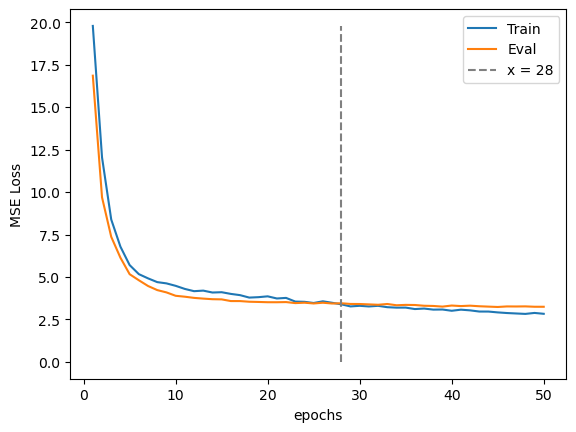

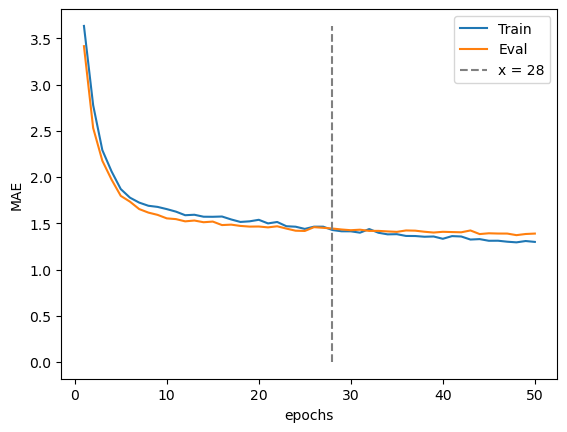

MAE on train set:  1.0431394906879514
min prediction: 0
max prediction: 9

MAE on test set:  1.3867781155015197
Error <= 3: 94.00 %
min prediction: 0
max prediction: 9


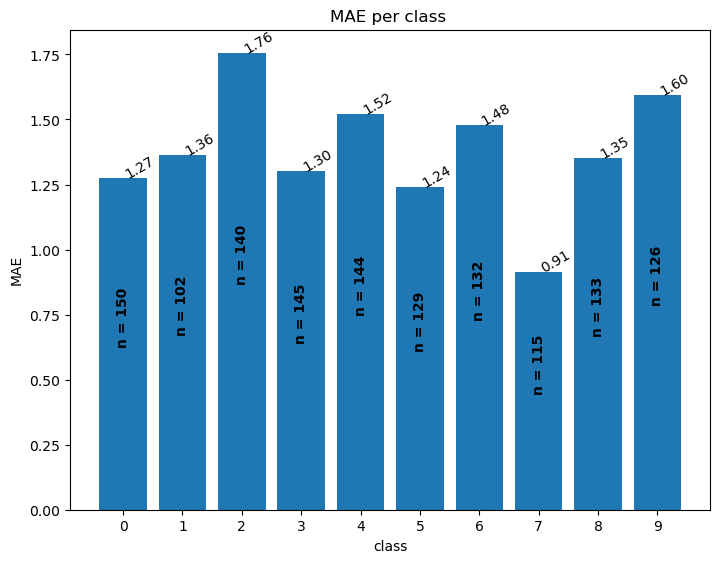

-----------|class error-MAE| difference-----------
mean: 0.247943974154198
std: 0.17988244271667575
coefficient of variation (std/mean): 0.7254963276695955

----------normalized difference-------------
mean: 0.3634504992912826
std: 0.26368200252550644


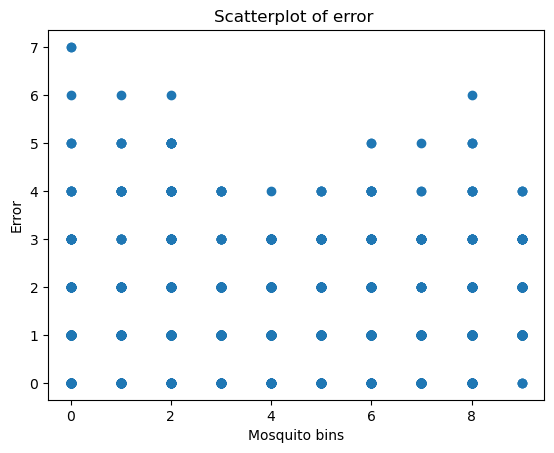

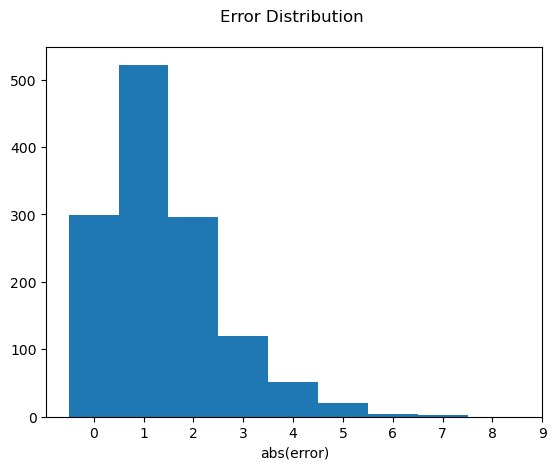

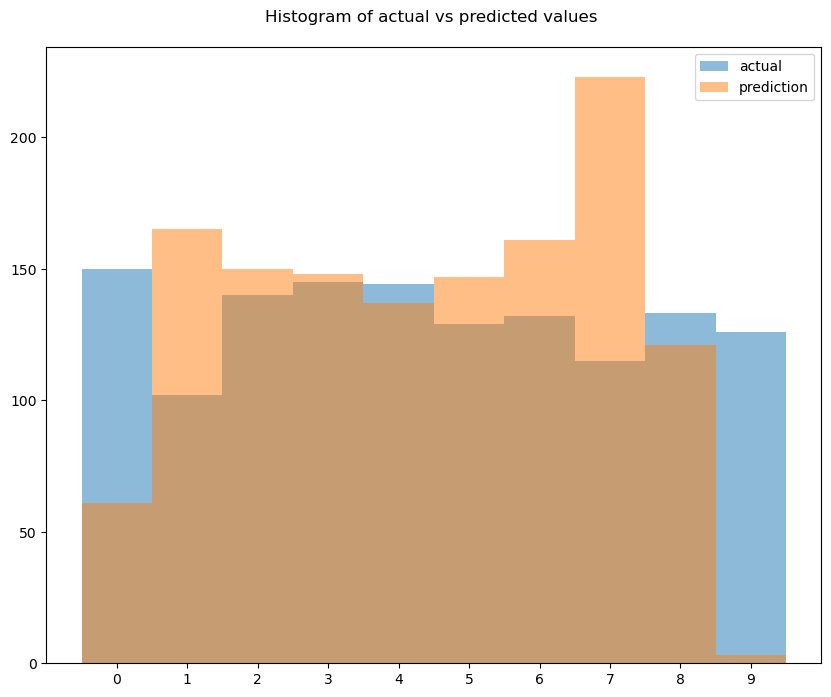

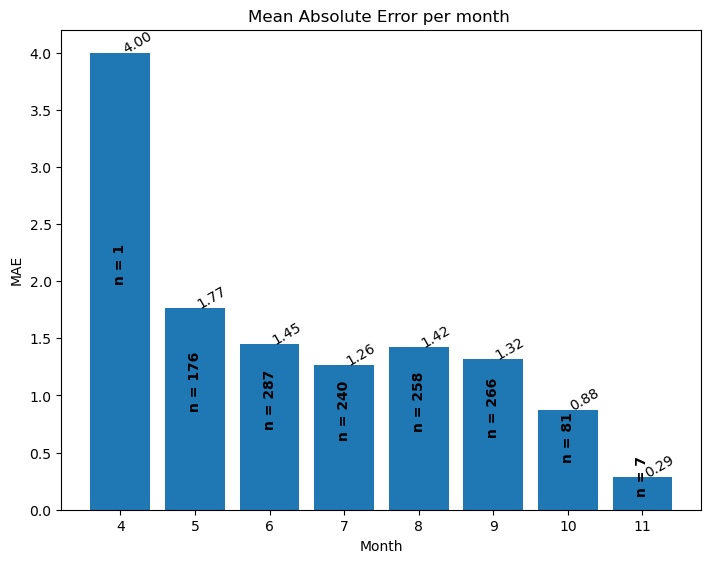

0     175
1     496
2     458
3     439
4     831
5    1482
6    1126
7     191
8       6
9       1
Name: prediction, dtype: int64

Low risk category stations: 671
Medium risk category stations: 3210
High risk category stations: 1324
#===========================================
Predictions with entomological features
#===========================================

Epoch 001: | Train Loss: 25.49190 | Val Loss: 22.84278 | Train Acc: 4.199| Val Acc: 4.025
Epoch 002: | Train Loss: 18.49611 | Val Loss: 13.83875 | Train Acc: 3.571| Val Acc: 3.139
Epoch 003: | Train Loss: 12.97076 | Val Loss: 9.78973 | Train Acc: 2.965| Val Acc: 2.647
Epoch 004: | Train Loss: 9.28502 | Val Loss: 7.36023 | Train Acc: 2.464| Val Acc: 2.210
Epoch 005: | Train Loss: 7.06836 | Val Loss: 5.76029 | Train Acc: 2.105| Val Acc: 1.883
Epoch 006: | Train Loss: 5.83990 | Val Loss: 5.00172 | Train Acc: 1.880| Val Acc: 1.760
Epoch 007: | Train Loss: 5.06287 | Val Loss: 4.44129 | Train Acc: 1.744| Val Acc: 1.639
Epoch 008: | T

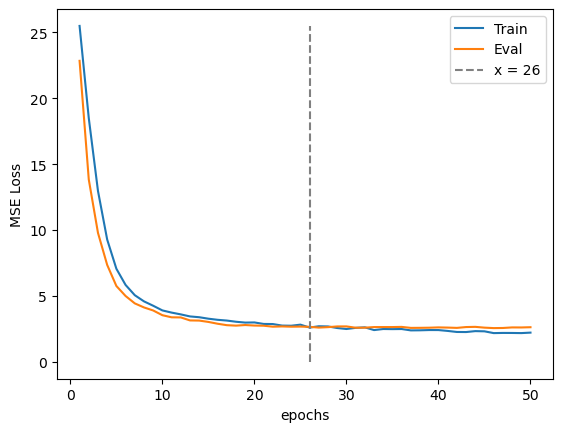

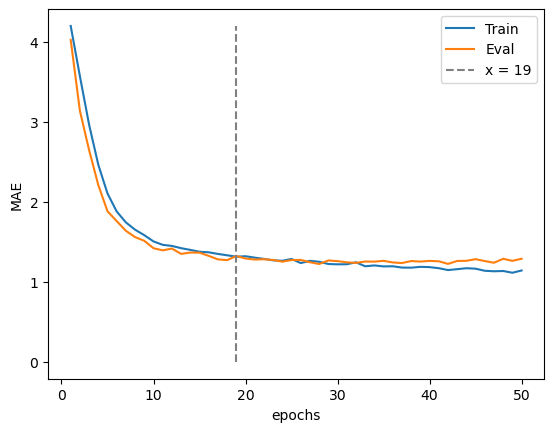

MAE on train set:  0.8965183752417795
min prediction: 0
max prediction: 9

MAE on test set:  1.2608695652173914
Error <= 3: 96.23 %
min prediction: 0
max prediction: 9


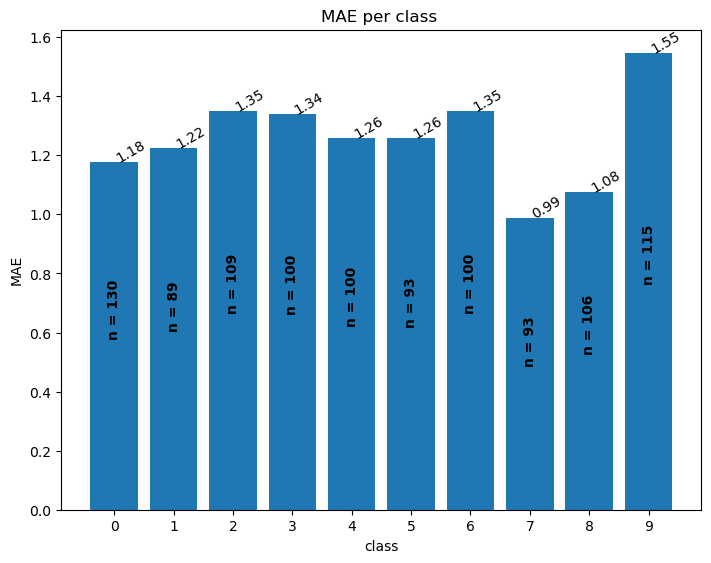

-----------|class error-MAE| difference-----------
mean: 0.2907385225280817
std: 0.14853322736073785
coefficient of variation (std/mean): 0.5108825141889871

----------normalized difference-------------
mean: 0.5204969029859112
std: 0.2659127664250237


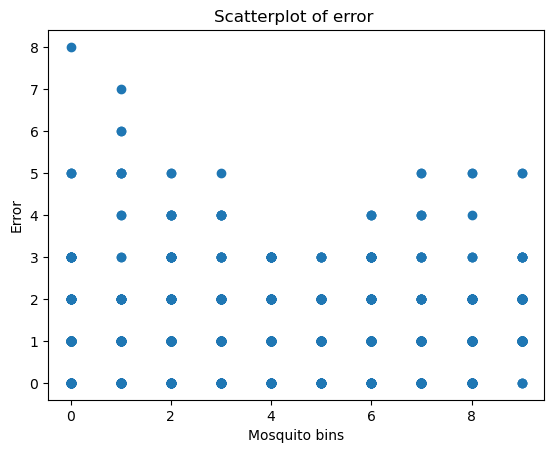

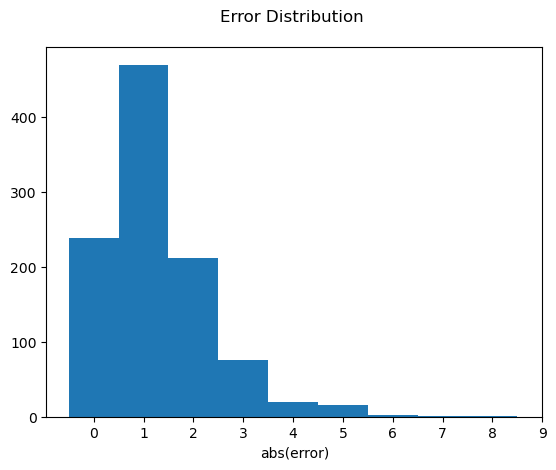

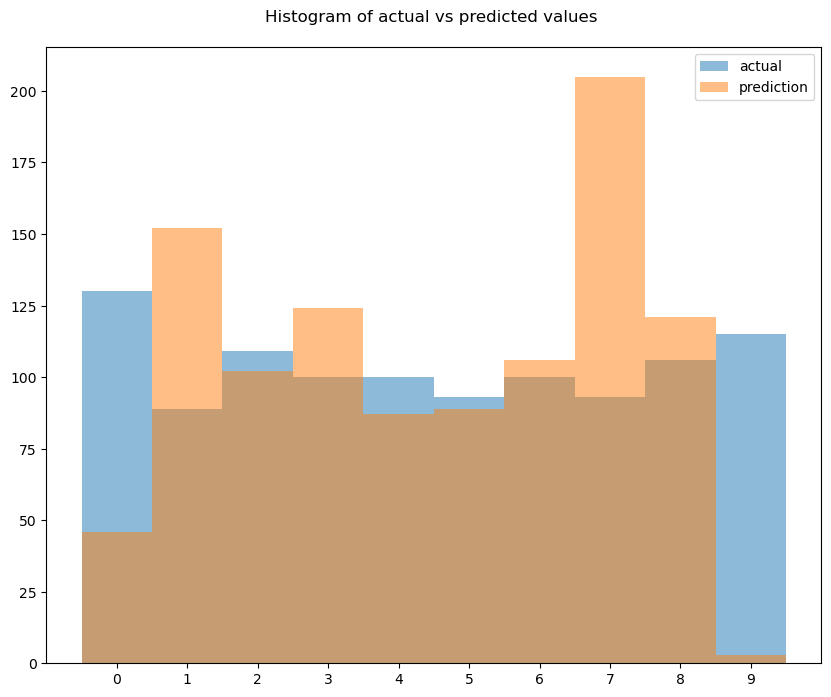

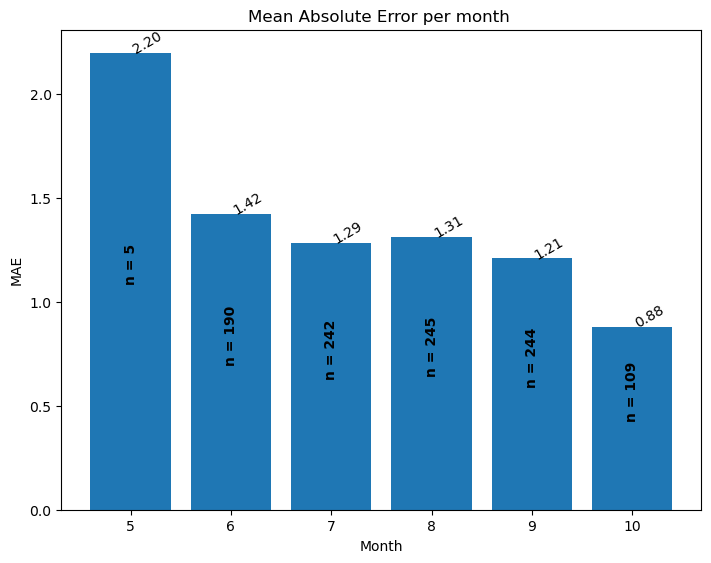

NameError: name 'test_etom' is not defined

In [8]:
#=====================================================================
# Automation models without or with/without entomological data
#=====================================================================

# Spit to train and test based on date of predictions
test = data.loc[data[date_col] >= pd.to_datetime(date)]
data = data.loc[data[date_col] < pd.to_datetime(date)]

# Delete from test set stations that are not used during the last 3 years
# test = unused_stations(data, test, period=3)

#Remove features that are more 40% filled with nan values in the test set
data, test = remove_nan_features(data, test, 0.4)

# set the only_env as True if there are no mosquitoes for the forecast month
only_env=None    
if len(test.dropna(subset=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                           'mosq_sum_previous_2weeks','previous_mosq_measure']).drop(columns=['mosq_now']).dropna())>0:
    only_env=False
elif len(test.drop(columns=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                           'mosq_sum_previous_2weeks', 'previous_mosq_measure', 'mosq_now']).dropna())>0:
    only_env=True
else:
    print('No data left for prediction')
    
num_class = 1
hidden_layers = [264,128,128,64,32]
learning_rate = 0.001
epochs = 50
batch_size = 128
dropout = 0.2
# set the early stop argument as early_stop = (tolerance, min_delta)
early_stop = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the boolean for plotting feature importance (!very time consuming!)
fi = False
    
if only_env != None:
    # Run first without entomological features
    print("#===========================================")
    print("Predictions without entomological features")
    print("#===========================================")
    print()
    data_env = data.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)
    test_env = test.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)

    data_env = data_env.dropna().reset_index(drop=True)
    test_env = test_env.dropna(subset=test_env.columns.difference(['mosq_now'])).reset_index(drop=True)

    
    model = FeedforwardNeuralNetModel(num_features=len(data_env.iloc[0,:])-2, num_class=num_class,
                                      hidden_layers = hidden_layers, model_type=model_type,
                                      learning_rate = learning_rate, epochs = epochs, batch_size = batch_size,
                                      dropout = dropout, embedding_data=embedded_data, 
                                      transformation_list=transformation_list, early_stop = early_stop, 
                                      l1_weight=0, l2_weight=0, weights=False)

    evaluate_nn(model, data_env, fi = fi)

    predictions_env = give_predictions_nn(model, data_env, test_env, env = True, filepath = path, case = title,
                                          export = only_env)

    # Run with entomological features if at least one station has mosquitos number
    if not only_env:
        print("#===========================================")
        print("Predictions with entomological features")
        print("#===========================================")
        print()
        
        data_entom = data.dropna().reset_index(drop=True)
        test_entom = test.dropna(subset=test.columns.difference(['mosq_now'])).reset_index(drop=True)
        
        model = FeedforwardNeuralNetModel(num_features=len(data_entom.iloc[0,:])-2, num_class=num_class,
                                          hidden_layers = hidden_layers, model_type=model_type,
                                          learning_rate = learning_rate, epochs = epochs, batch_size = batch_size,
                                          dropout = dropout, embedding_data=embedded_data, 
                                          transformation_list=transformation_list, early_stop = early_stop, 
                                          l1_weight=0, l2_weight=0, weights=False)
        
        evaluate_nn(model, data_entom, fi = fi)

        predictions_entom = give_predictions_nn(model, data_entom, test_entom, env = False, filepath = path,
                                                case = title, export = False)

        print("#===========================================")
        print("Predictions with/without entomological features")
        print("#===========================================")
        merge_predictions(predictions_env,predictions_entom,path,title,export=True)

Features Dropped: ['lst_day', 'lst_night', 'lst']
#===========================================
Predictions without entomological features
#===========================================



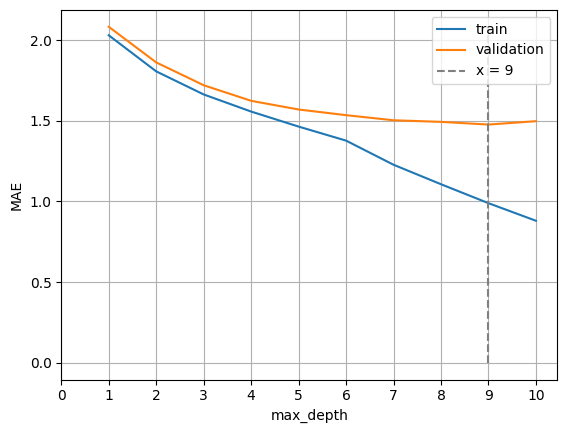

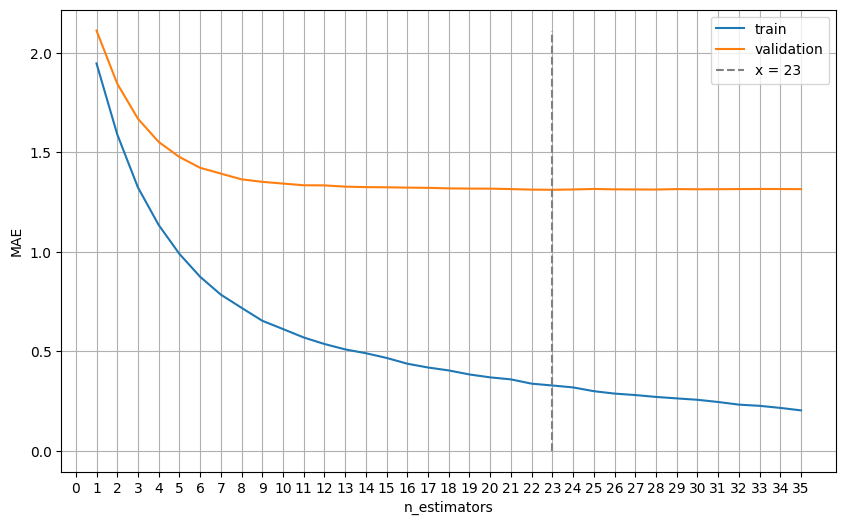

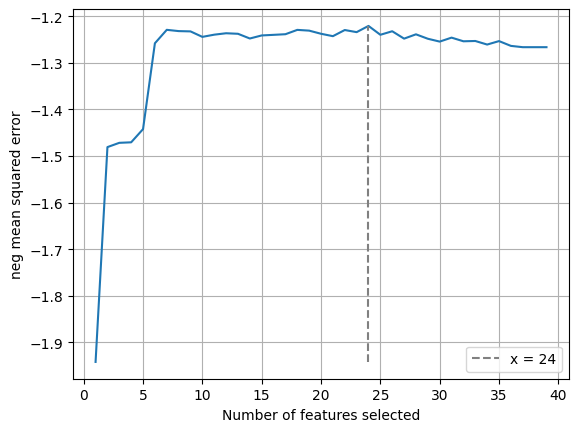

max_depth:  9
Number of estimators:  23
Selected_features:  Index(['x', 'y', 'key_0', 'lst_jan_day_mean', 'lst_feb_day_mean',
       'lst_mar_day_mean', 'lst_apr_day_mean', 'lst_jan_night_mean',
       'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean',
       'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER', 'SLOPE_mean_1km',
       'ASPECT_mean_200m', 'ELEVATION_mean_1km', 'HILLSHADE_mean_1km',
       'FS_AREA_1km', 'FLOW_ACCU_200m', 'landcover', 'null_island_distance',
       'days_distance', 'mo_cos', 'year'],
      dtype='object')
MAE on train set:  0.37401945403200504
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.146173149309912
Error <= 3: 96.74 %
min prediction: -0.0
max prediction: 9.0


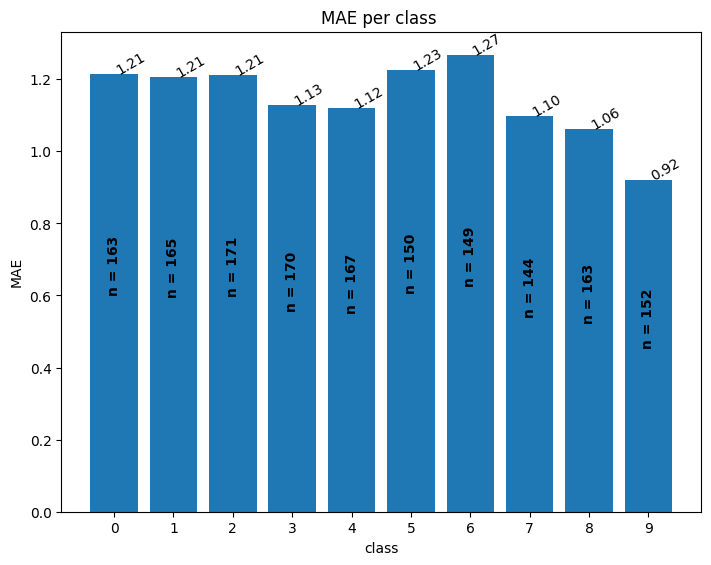

-----------|class error-MAE| difference-----------
mean: 0.22447043657470694
std: 0.09752140634194449
coefficient of variation (std/mean): 0.4344510031256966

----------normalized difference-------------
mean: 0.6461370675576972
std: 0.2807148971571376


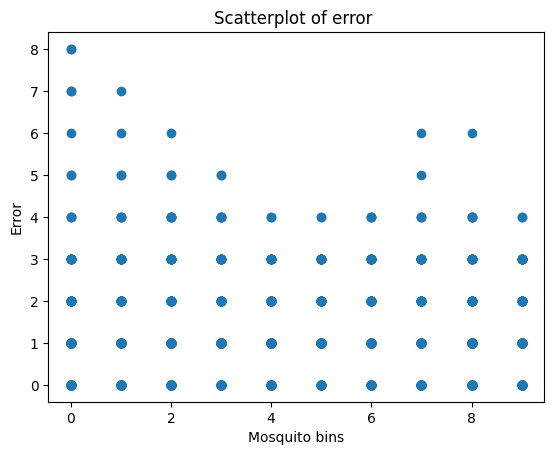

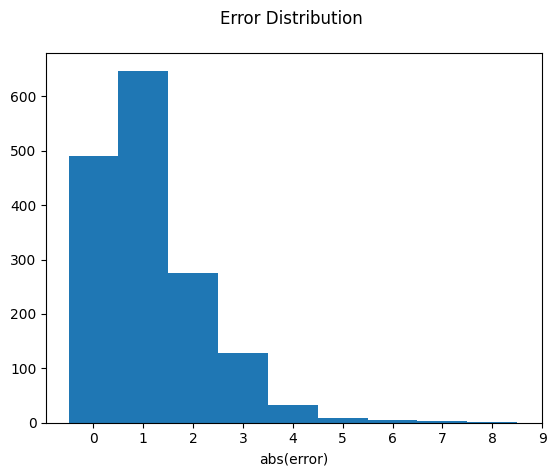

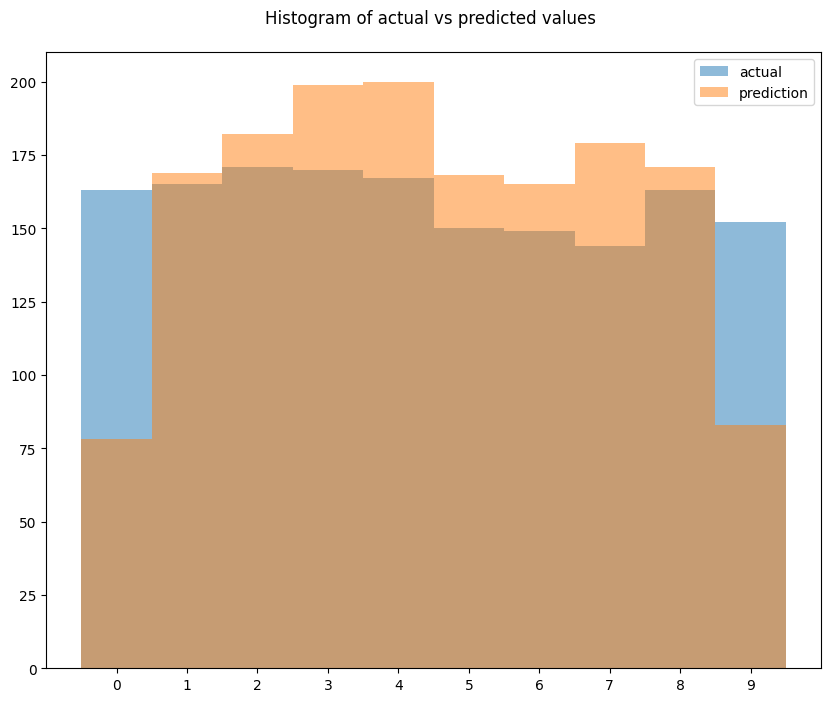

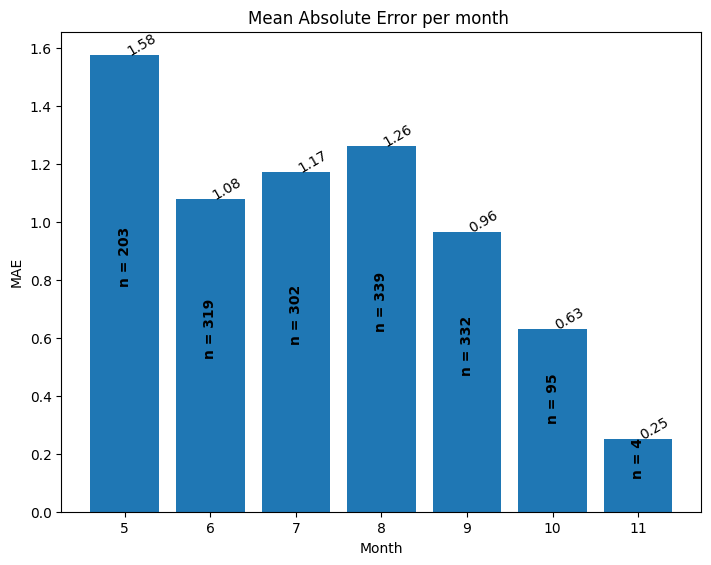

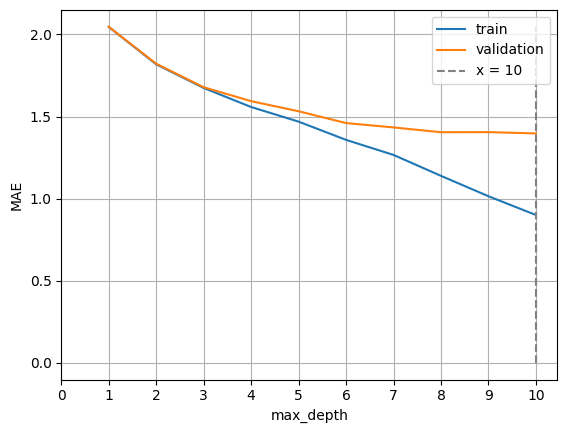

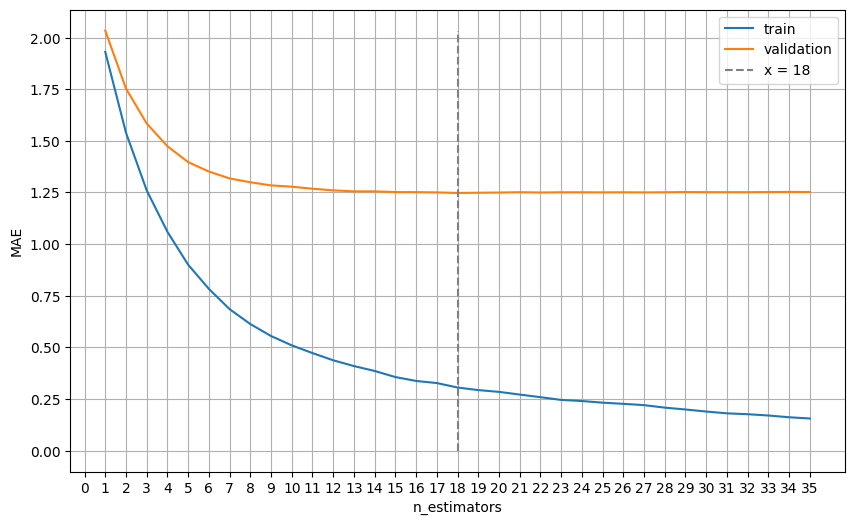

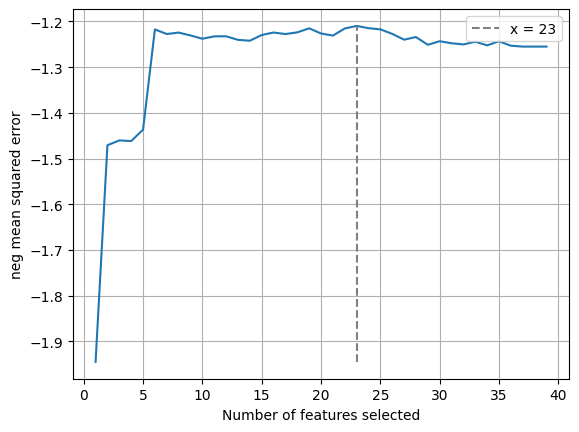

max_depth:  10
Number of estimators:  18
Selected_features:  Index(['y', 'key_0', 'lst_feb_day_mean', 'lst_mar_day_mean',
       'lst_apr_day_mean', 'lst_jan_night_mean', 'lst_feb_night_mean',
       'lst_mar_night_mean', 'lst_apr_night_mean', 'DISTANCE_TO_COAST',
       'DISTANCE_TO_RIVER', 'SLOPE_mean_1km', 'ASPECT_mean_200m',
       'ELEVATION_mean_1km', 'HILLSHADE_mean_1km', 'FS_AREA_1km',
       'FLOW_ACCU_200m', 'landcover', 'null_island_distance', 'days_distance',
       'mo_cos', 'year', 'summer_days_month'],
      dtype='object')
prediction
-0.0    2588
 1.0    1292
 2.0     853
 3.0    1150
 4.0     584
 5.0     156
 6.0      24
Name: count, dtype: int64

Low risk category stations: 3880
Medium risk category stations: 2743
High risk category stations: 24


In [7]:
#=====================================================================
# Automation models without or with/without entomological data
#=====================================================================

data = data.drop(columns = ['acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan'])

# Spit to train and test based on date of predictions
test = data.loc[data[date_col] >= pd.to_datetime(date)]
data = data.loc[data[date_col] < pd.to_datetime(date)]

# Delete from test set stations that are not used during the last 3 years
# test = unused_stations(data, test, period=3)

#Remove features that are more 30% filled with nan values in the test set
data, test = remove_nan_features(data, test, 0.3)

# set the only_env as True if there are is none  recent mosquito info for all points for the forecast month
only_env=None    
if len(test.dropna(subset=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                           'mosq_sum_previous_2weeks','previous_mosq_measure']).drop(columns=['mosq_now']).dropna())>0:
    only_env=False
elif len(test.drop(columns=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                           'mosq_sum_previous_2weeks', 'previous_mosq_measure', 'mosq_now']).dropna())>0:
    only_env=True
else:
    print('No data left for prediction')
    

learning_rate = 0.3
# set the early stop argument as early_stop = (tolerance, min_delta)
early_stop = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = []
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the boolean for plotting feature importance (!very time consuming!)
fi = False
    
if only_env != None:
    # Run first without entomological features
    print("#===========================================")
    print("Predictions without entomological features")
    print("#===========================================")
    print()
    data_env = data.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)
    test_env = test.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)
    
    data_env = data_env.dropna().reset_index(drop=True)
    test_env = test_env.dropna(subset=test_env.columns.difference(['mosq_now'])).reset_index(drop=True)

    model = Xgboost_model(model_type = model_type, learning_rate = learning_rate,
                          embedding_data = embedded_data,  transformation_list = transformation_list,
                          early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)
    
    evaluate_xgboost(model, data_env, fi = fi)

    predictions_env = give_predictions_xgboost(model, data_env, test_env, env = True, filepath = path, case = title,
                                               fi = fi, export = only_env)


    # Run with entomological features if at least one station has mosquitos number
    if not only_env:
        print("#===========================================")
        print("Predictions with entomological features")
        print("#===========================================")
        print()
        
        data_entom = data.dropna().reset_index(drop=True)
        test_entom = test.dropna(subset=test.columns.difference(['mosq_now'])).reset_index(drop=True)
        
        model = Xgboost_model(model_type = model_type, learning_rate = learning_rate,
                              embedding_data = embedded_data,  transformation_list = transformation_list,
                              early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)
    
        evaluate_xgboost(model, data_entom, fi = fi)

        predictions_entom = give_predictions_xgboost(model, data_entom, test_entom, env = False, filepath = path,
                                                     fi = fi, case = title, export = False)

        print("#===========================================")
        print("Predictions with/without entomological features")
        print("#===========================================")
        merge_predictions(predictions_env,predictions_entom, path, title, export=True)